In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss

 #parameters 
m_0 = 1.0                                          #m=sqrt(x**2+y**2+(z/q)**2)
#n = 4.0                                            #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
n = 4
re = 1 #1kpc

f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations
bn = root

r_0 = re/bn**n

print(r_0) #in kpc
print(bn)
#r_0 = 1.4e-3                                          #characteristic radius (kpc)

 #integrate
f = lambda x: ((np.exp(-np.power(x/r_0, (1/n))))*(np.power(x/r_0, ((1/n)-1))))/(np.sqrt((x**2)-(m_0**2)));

I = quad(f, m_0, np.inf)

print(I)


0.0002890603422216945
7.669249591476784
(8.435998585962735e-07, 2.748140543925725e-11)


In [2]:
g = lambda m: quad(f, m, np.inf)[0]
print(g(10))

1.0841696023398993e-10


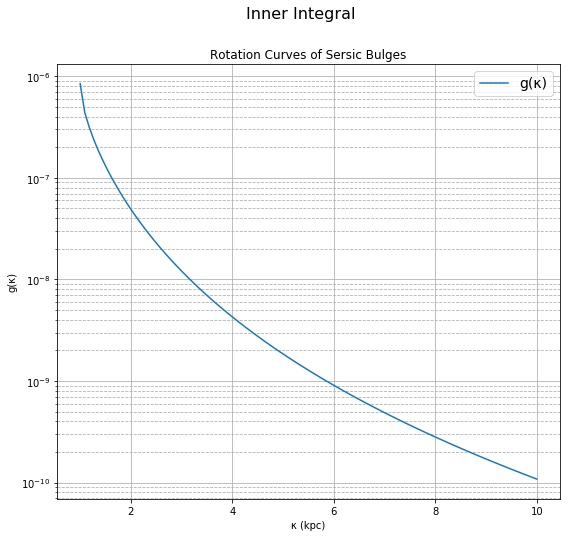

In [3]:
#adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #functions
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [4]:
 #parameters
I_0 = 1.08e8                                        #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                           #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                            #intrinsic axis ratio
i = 40*(np.pi/180)                                  #inclination angle

#equations
C = (4*G*q*ups*I_0)/(r_0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)
x = np.linspace(10, 8000, 80)

h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))
#l = lambda r: quad(h, 1, r)[0]
y = np.zeros(np.shape(x))
print(y)
for j,r in enumerate(x):
    hr = lambda m: h(m,r)
    yr = quad(hr, 1, r)[0]
    y[j] = yr
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0.28681775 0.02561245 0.01339408 0.0090697  0.00685639 0.00551149
 0.0046077  0.00395857 0.00346976 0.0030884  0.00278257 0.00253186
 0.00232259 0.00214527 0.00199311 0.0018611  0.0017455  0.00164341
 0.00155261 0.00147132 0.00139811 0.00133185 0.00127158 0.00121653
 0.00116605 0.00111959 0.00107669 0.00103696 0.00100006 0.00096569
 0.0009336  0.00090358 0.00087543 0.00084898 0.00082409 0.00080061
 0.00077843 0.00075745 0.00073756 0.0007187  0.00070078 0.00068373
 0.00066749 0.000652   0.00063721 0.00062308 0.00060957 0.00059663
 0.00058422 0.00057232 0.0005609  0.00054992 0.00053937 0.00052921
 0.00051943 0.00051    0.00050091 0.00049214 0.00048366 0.00047548
 0.00046757 0.00045992 0.00045251 0.00044534 0.00043839 0.00043166
 0.00042513 0.0004

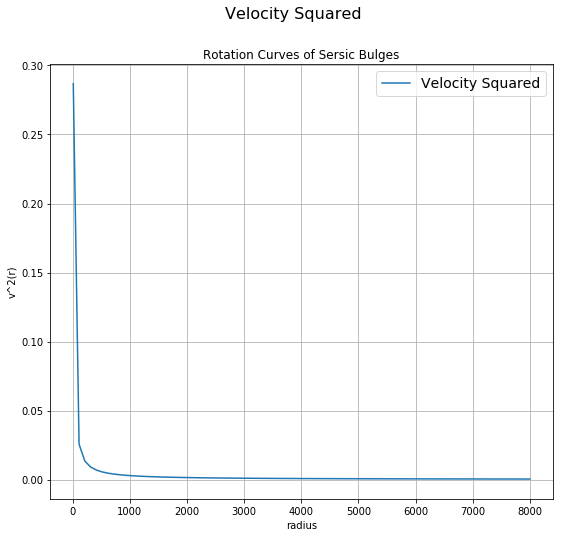

In [5]:
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

#x = np.linspace(1, 10, 100)                    #x from/to and line smoothness
#lv = np.vectorize(l)

 #functions
#plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          
plt.plot(x, y, linestyle='solid', label='Velocity Squared')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

plt.legend(fontsize=14);                                   #adding legend
plt.show()

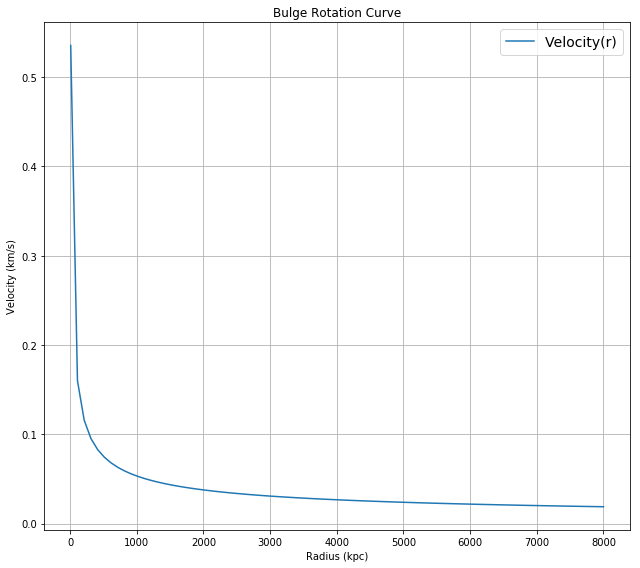

In [6]:
v = np.sqrt(y)

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


 #functions
plt.plot(x, v, linestyle='solid', label='Velocity(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
ax3.set(title='Bulge Rotation Curve')              #labeling axes
ax3.set(xlabel='Radius (kpc)', ylabel='Velocity (km/s)');

plt.legend(fontsize=14);                                   #adding legend
plt.tight_layout()
plt.savefig('Bulge_Rotation_Curve.png')
plt.show()